In [6]:
# Importing the necessary libraries and packages
# Importing the VGG16 model from Keras
from keras.applications.vgg16 import VGG16 

# Importing the ResNet50 model from TensorFlow
from tensorflow.keras.applications.resnet50 import ResNet50 

# Importing the Model class from Keras
from keras.models import Model                 

# Importing the image preprocessing module from Keras
from keras.preprocessing import image          

# Importing the necessary layers from TensorFlow Keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout 

# Importing NumPy for numerical operations
import numpy as np                             

# Importing TensorFlow
import tensorflow as tf                        

# Importing Matplotlib for visualization
import matplotlib.pyplot as plt                

# Configuring Matplotlib for inline plotting
%matplotlib inline                              

# Importing the os module for file operations
import os                                      

 # Importing OpenCV for image processing
import cv2                                    

# Setting the directory path for training data
train_dir = "./training_set"

# Setting the directory path for test data
eval_dir = "./test_set"


In [7]:
# Defining a helper function to load images from given directories
import keras  # Importing Keras

def load_images(directory):
    images = []    # Initializing an empty list to store images
    labels = []    # Initializing an empty list to store labels
    for idx, label in enumerate(uniq_labels):   # Iterating through the list of unique labels

        for file in os.listdir(directory + "/" + label):   # Iterating through the files in the given directory and label
            
            filepath = directory + "/" + label + "/" + file    # Getting the file path
            image = cv2.resize(cv2.imread(filepath), (64, 64))   # Reading and resizing the image using OpenCV
            images.append(image)    # Appending the image to the list of images
            labels.append(idx)      # Appending the label index to the list of labels
    images = np.array(images)      # Converting the list of images to a NumPy array
    labels = np.array(labels)      # Converting the list of labels to a NumPy array
    return(images, labels)         # Returning the images and labels as NumPy arrays

# Getting the list of unique labels from the training directory
uniq_labels = sorted(os.listdir(train_dir))
uniq_labels.remove('.DS_Store')   # Removing the .DS_Store file from the list of labels if present

# Loading the images and labels from the training directory
images, labels = load_images(directory = train_dir)

# Getting the list of unique labels from the evaluation directory
uniq_labels_eval=sorted(os.listdir(eval_dir))
uniq_labels_eval.remove('.DS_Store')   # Removing the .DS_Store file from the list of labels if present

# Checking if the list of unique labels from the training and evaluation directory are the same
if uniq_labels == uniq_labels_eval :
    # Loading the images and labels from the evaluation directory if the labels are the same
    X_eval, y_eval = load_images(directory = eval_dir)


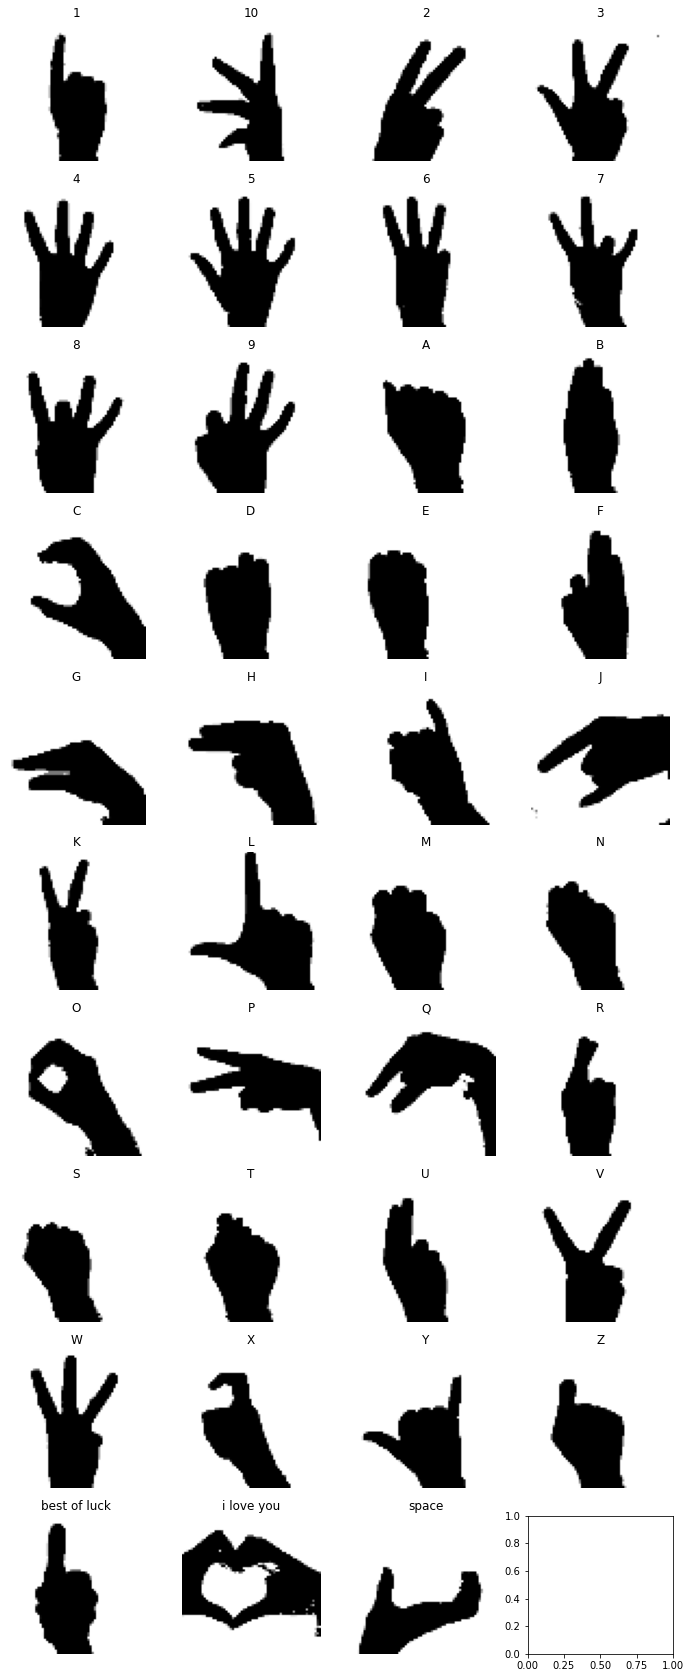

In [46]:
# create a grid of subplots
num_rows = int(np.ceil(len(unique_indices) / 4))
fig, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 3*num_rows))

# display each image in a subplot
for i, j in enumerate(unique_indices):
    row_idx = i // 4
    col_idx = i % 4
    ax[row_idx, col_idx].imshow(images[j])
    ax[row_idx, col_idx].set_title(uniq_labels[i])
    ax[row_idx, col_idx].axis('off')

# for i,j in enumerate(unique_indices):
#     print(uniq_labels[i])
#     print(plt.imshow(images[j]))
    

In [27]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split

# Splitting the images and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels,shuffle=True)

# Getting the number of unique labels, training images, and testing images
n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

# Printing the total number of unique symbols, number of training images, and number of testing images
print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

# Getting the number of evaluation images
eval_n = len(X_eval)

# Printing the number of evaluation images
print("Number of evaluation images: ", eval_n)


Total number of symbols:  39
Number of training images:  47068
Number of testing images:  11768
Number of evaluation images:  7800


In [28]:
X_train.shape

(47068, 64, 64, 3)

In [29]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 1120,
 1: 1211,
 2: 1120,
 3: 1120,
 4: 1220,
 5: 1210,
 6: 1220,
 7: 1219,
 8: 1221,
 9: 1234,
 10: 1229,
 11: 1215,
 12: 1221,
 13: 1222,
 14: 1129,
 15: 1218,
 16: 1231,
 17: 1342,
 18: 1174,
 19: 1205,
 20: 1166,
 21: 1164,
 22: 1178,
 23: 1129,
 24: 1235,
 25: 1222,
 26: 1206,
 27: 1227,
 28: 1239,
 29: 1222,
 30: 1214,
 31: 1230,
 32: 1231,
 33: 1214,
 34: 1214,
 35: 1214,
 36: 1220,
 37: 1245,
 38: 1217}

In [30]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 280,
 1: 303,
 2: 280,
 3: 280,
 4: 305,
 5: 302,
 6: 305,
 7: 305,
 8: 305,
 9: 309,
 10: 307,
 11: 304,
 12: 305,
 13: 305,
 14: 282,
 15: 305,
 16: 308,
 17: 336,
 18: 293,
 19: 301,
 20: 291,
 21: 291,
 22: 295,
 23: 282,
 24: 309,
 25: 306,
 26: 301,
 27: 307,
 28: 310,
 29: 306,
 30: 304,
 31: 308,
 32: 308,
 33: 304,
 34: 303,
 35: 303,
 36: 305,
 37: 311,
 38: 304}

In [31]:
# Converting the labels to categorical arrays for training, testing, and evaluation datasets
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [32]:
# Printing the categorical label of the first image in the training set
print(y_train[0])

# Printing the length of the categorical label
print(len(y_train[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
39


In [33]:
# Converting the pixel values of the images to float and scaling them between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_eval = X_eval.astype('float32') / 255.0


In [34]:
# Initializing VGG16 and ResNet50 models with ImageNet weights and without the top layer
# The input shape is (64, 64, 3) as our images are resized to 64x64 pixels and have 3 color channels (RGB)
classifier_vgg16 = VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
classifier_resnet = ResNet50(input_shape=(64, 64, 3), include_top=False, weights='imagenet')

In [35]:
# Setting the layers of the pre-trained models as non-trainable
# We don't want to update the weights of the pre-trained models during training
for layer in classifier_vgg16.layers:
    layer.trainable = False

for layer in classifier_resnet.layers:
    layer.trainable = False


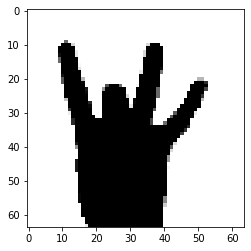

In [36]:
plt.imshow(X_test[0])

In [37]:
#VGG16
# Getting the output of the VGG16 convolutional base as input for the new model
classifier1 = classifier_vgg16.output
# Adding a flatten layer to convert the output into a 1D feature vector
classifier1 = Flatten()(classifier1)
# Adding a fully connected dense layer with 256 units and ReLU activation
classifier1 = Dense(units=256, activation='relu')(classifier1)
# Adding a dropout layer to prevent overfitting
classifier1 = Dropout(0.3)(classifier1)
# Adding the output layer with softmax activation and 39 units (number of classes)
classifier1 = Dense(units=39, activation='softmax')(classifier1)
# Creating the final model using the VGG16 convolutional base as input and the new classifier as output
model = Model(inputs = classifier_vgg16.input , outputs = classifier1)
# Compiling the model with Adam optimizer, categorical crossentropy loss and accuracy metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Printing the summary of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
# Train the model on training data and evaluate on testing data for 5 epochs 
history = model.fit(X_train, y_train, epochs =5, batch_size =32,validation_data=(X_test,y_test))

# Save the trained model
model.save('model_vgg16_new.h5')

In [ ]:
# Defining the head model for resnet50
classifier2 = classifier_resnet.output
classifier2 = Flatten()(classifier2) # Adding a layer of flatten
classifier2 = Dense(units=256, activation='relu')(classifier2)
classifier2 = Dropout(0.2)(classifier2)
classifier2 = Dense(units=39, activation='softmax')(classifier2)
# Initializing the model with resnet50 as the base
model2 = Model(inputs=classifier_resnet.input, outputs=classifier2)
# Compiling the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Printing the summary of the model
model2.summary()


In [ ]:
# Train the ResNet50 model
history2 = model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Save the trained ResNet50 model
model2.save('model_resnet.h5')


In [1]:
import pickle
from keras.models import load_model
import tensorflow as tf


# Load the models
# Load the models
model_VGG=tf.keras.models.load_model('model_vgg16.h5',compile=False)
model_ResNet=tf.keras.models.load_model('model_resnet.h5',compile=False)

model_VGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load history object from binary file
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

# Load history2 object from binary file
with open('history2.pkl', 'rb') as f:
    history2 = pickle.load(f)

2023-04-10 13:29:03.535733: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [39]:
# Evaluating accuracy on the test images for VGG16 model
score = model_VGG.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

# Evaluating accuracy on the evaluation images for VGG16 model
score = model_VGG.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

# Evaluating accuracy on the test images for ResNet50 model
score = model_ResNet.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

# Evaluating accuracy on the evaluation images for ResNet50 model
score = model_ResNet.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')


Accuracy for test images: 100.0 %
Accuracy for evaluation images: 100.0 %
Accuracy for test images: 99.932 %
Accuracy for evaluation images: 100.0 %


In [3]:
history

{'loss': [0.10419777780771255,
  0.00239004148170352,
  0.004089837893843651,
  0.00030129816150292754,
  0.006500625982880592],
 'accuracy': [0.9796464443206787,
  0.9997237920761108,
  0.998937726020813,
  0.99997878074646,
  0.99821537733078],
 'val_loss': [0.0006664430256932974,
  0.00015698064817115664,
  0.0008796597830951214,
  5.3660962294088677e-05,
  2.0347737518022768e-05],
 'val_accuracy': [1.0, 1.0, 0.9997450709342957, 1.0, 1.0]}

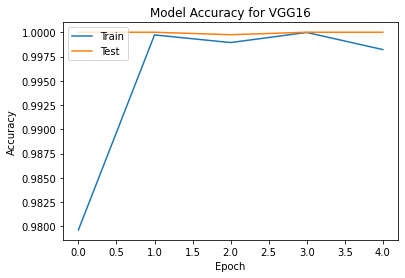

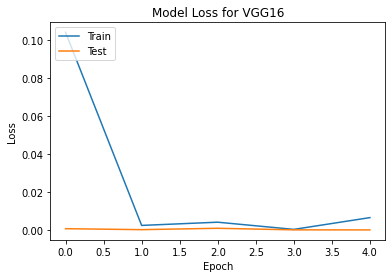

In [4]:
# Visualizing accuracy and loss for VGG16 model
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy for VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss for VGG16')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


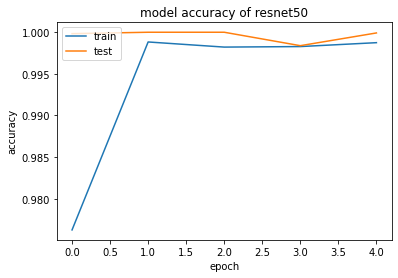

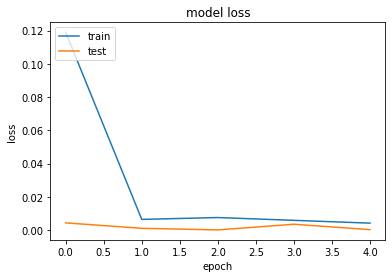

In [5]:
#resnet50
# summarize history for accuracy
import matplotlib.pyplot as plt

# plot the training accuracy and validation accuracy for resnet50 model
plt.plot(history2['accuracy'])
plt.plot(history2['val_accuracy'])
plt.title('model accuracy of resnet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the training loss and validation loss for resnet50 model
plt.plot(history2['loss'])
plt.plot(history2['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
